In [1]:
## import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    # 1.	Read the given comma separated file as dataframe.
    # 2.	List out all columns names.
    # 3.	Create a dataframe with numerical columns.
    # 4.	Create a dataframe with categorical columns.
    # 5.	Get summary on the data and draw inferences if any.
    # 6.	Display duplicate rows.
    # 7.	For each column find out percentage of missing values.
    # 8.	Find count of ‘name’ in each ‘country_code’.
    # 9.	What is the percentage of the companies which have status ‘acquired’ and ‘operating’?
    # 10.	Create a column ‘category_list_count’ having count of category lists.
    # 11.	Find total ‘fundings’ for each country_code.
    # 12.	Find average ‘fundings’ for each country_code.
    # 13.	Find average ‘fundings’ in each region.
    # 14.	How many companies have got just 1 round of funding?
    # 15.	How many companies have ‘debt_financing’ above zero?
    # 16.	Create a column ‘homepage’ to store company name from ‘homepage_url’: For example: If url is http://www.waywire.com, name is waywire.
    # 17.	Find count of companies in each of the market.
    # 18.	Rename ' funding_total_usd ' to 'funding_total_usd'
    # 19.	For each row in column ‘funding_total_usd’, calculate actual – average value for each group ‘city’
    # 20.	What is average ‘funding_Total_used’ for each city?
    # 21.	Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.
    # 22.	What is maximum ‘funding_total_usd’ for each market status?
    # 23.	How many years it have been since each company was founded?
    # 24.	Visualize ‘grant’ distribution.
    # 25.	Visualize ‘debt_financing’ distribution.


In [2]:
# 1.Read the given comma separated file as dataframe.
df = pd.read_csv('investments.csv', encoding = 'latin-1')
df.shape

(49438, 14)

In [3]:
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0


In [4]:
# 2.List out all columns names.
df.columns

Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_year', 'debt_financing', 'grant'],
      dtype='object')

In [5]:
# 3.Create a dataframe with numerical columns.
df2 = df.select_dtypes(include=[np.number])
df2.head()

,funding_rounds,founded_year,debt_financing,grant
0,1,2012.0,0,0
1,2,NaN,0,0
2,1,2012.0,0,0
3,1,2011.0,0,0
4,2,2014.0,0,0


In [6]:
# 4.Create a dataframe with categorical columns.
df2 = df.select_dtypes(include=[np.object])
df2.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth


In [7]:
# 5.Get summary on the data and draw inferences if any.
df.describe()

,funding_rounds,founded_year,debt_financing,grant
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,1.888157e+06,1.628453e+05
std,1.294213,7.579203,1.382046e+08,5.612088e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,3.007950e+10,7.505000e+08


In [8]:
# 6.Display duplicate rows.
df.duplicated().sum() # duplicate count at record level

0

In [9]:
df.duplicated(subset=['name','category_list',' market ']).sum() # duplicate count at name, category_list, market level

3

In [10]:
df[df.duplicated(subset=['name','category_list',' market '])].head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
4150,AYOXXA Biosystems,http://www.ayoxxa.com/,|Biotechnology|,Biotechnology,"1,40,81,347",operating,DEU,NaN,Cologne,Köln,1,2010.0,0,0
24028,Lightex Ltd.,NaN,NaN,NaN,"5,00,000",operating,NaN,NaN,NaN,NaN,1,NaN,0,0
36084,Roadmap,NaN,NaN,NaN,-,operating,USA,NC,Charlotte,Charlotte,1,2011.0,0,0


In [11]:
# df[(df['name'] == 'AYOXXA Biosystems') & (df.category_list==str('|Biotechnology|')) & (df[' market ']=='Biotechnology')]

In [12]:
df[(df['name'] == 'Roadmap')]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
36083,Roadmap,http://www.roadmapsystems.co.uk/,NaN,NaN,-,operating,GBR,NaN,London,Cambridge,1,NaN,0,0
36084,Roadmap,NaN,NaN,NaN,-,operating,USA,NC,Charlotte,Charlotte,1,2011.0,0,0
36085,Roadmap,http://www.ppmroadmap.com,|Enterprise Resource Planning|Project Manageme...,Productivity Software,"1,50,000",operating,USA,MD,Baltimore,Baltimore,1,2012.0,0,0


In [13]:
df.drop_duplicates().shape

(49438, 14)

In [14]:
# 7.For each column find out percentage of missing values.
round(df.isnull().sum()/df.shape[0]*100, 2)

name                    0.00
homepage_url            6.98
category_list           8.01
 market                 8.03
 funding_total_usd      0.00
status                  2.66
country_code           10.67
state_code             38.99
region                 10.67
city                   12.37
funding_rounds          0.00
founded_year           22.16
debt_financing          0.00
grant                   0.00
dtype: float64

In [15]:
# selecting columns having missing values above threshold (10)
s = round(df.isnull().sum()/df.shape[0]*100, 2)
_ = pd.DataFrame(s, columns=['per_missing'])
_[_.per_missing > 10]

,per_missing
country_code,10.67
state_code,38.99
region,10.67
city,12.37
founded_year,22.16


In [16]:
df[df.name.isnull()] # returns all records having 'name' null

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
28221,NaN,http://tellitin10.com,|Startups|,Startups,"25,000",closed,NaN,NaN,NaN,NaN,1,2011.0,0,0


In [17]:
# 8.Find count of ‘name’ in each ‘country_code’.
# df.groupby(by = ['country_code']).groups
df.groupby(by = ['country_code'])['name'].count()

country_code
ALB        1
ARE       66
ARG      149
ARM        2
AUS      314
       ...  
USA    28793
UZB        1
VNM       21
ZAF       52
ZWE        1
Name: name, Length: 115, dtype: int64

In [18]:
df.groupby(by = ['country_code'])[['name']].count().rename(columns={'name':'name_count'},inplace = False).sort_values('name_count', ascending = False)
# returns grouped count, renaming of column, & sorting countries by company_count in des order

,name_count
country_code,
USA,28793
GBR,2642
CAN,1405
CHN,1239
DEU,968
...,...
JEY,1
JAM,1
CIV,1


In [19]:
# 9.What is the percentage of the companies which have status ‘acquired’ and ‘operating’?
print(str(round(df[df.status=='acquired'].shape[0]/len(df)*100, 2))+'%')
print(str(round(df[df.status=='operating'].shape[0]/len(df)*100, 2))+'%')

7.47%
84.61%


In [20]:
print(str(round(df[(df.status=='acquired') & (df.status=='operating')].shape[0]/len(df)*100, 2))+'%')
print(str(round(df[(df.status=='acquired') | (df.status=='operating')].shape[0]/len(df)*100, 2))+'%')

0.0%
92.08%


In [21]:
# 10.Create a column ‘category_list_count’ having count of category lists.
'|Entertainment|Politics|Social Media|News|'.split('|')

['', 'Entertainment', 'Politics', 'Social Media', 'News', '']

In [22]:
# 11.Find total ‘fundings’ for each country_code.


In [23]:
df['category_list_count']=df['category_list'].apply(lambda x: len(str(x).split('|')) - 2)
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0,4
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,2
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0,10
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,3


In [24]:
df.loc[:,['category_list','category_list_count']]

,category_list,category_list_count
0,|Entertainment|Politics|Social Media|News|,4
1,|Games|,1
2,|Publishing|Education|,2
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,10
4,|Tourism|Entertainment|Games|,3
...,...,...
49433,|Analytics|Gamification|Developer APIs|iOS|And...,6
49434,|Enterprise Software|,1
49435,|Web Development|Advertising|Wireless|Mobile|,4
49436,|Games|,1


In [25]:
df.head(2)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0,4
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1


In [26]:
# 12.Find average ‘funding_total_usd’ for each country_code.
import re
# ',',' -   ','none'
df[' funding_total_usd '] = np.where(df[' funding_total_usd ']==' -   ', '0',
                                     df[' funding_total_usd '] )
df[' funding_total_usd '] = df[' funding_total_usd '].apply(lambda x: re.sub(',', '', x))
df[' funding_total_usd '] = df[' funding_total_usd '].astype('float')
df.groupby('country_code')[' funding_total_usd '].mean()

country_code
ALB    0.000000e+00
ARE    9.832352e+06
ARG    1.787353e+06
ARM    1.340649e+07
AUS    8.276922e+06
           ...     
USA    1.612353e+07
UZB    9.000000e+04
VNM    1.023431e+07
ZAF    1.243687e+07
ZWE    1.000000e+07
Name:  funding_total_usd , Length: 115, dtype: float64

In [27]:
df.region.isnull().sum()

5273

In [28]:
# 13.Find average ‘funding_total_usd’ in each region.
# import re
# # ',',' -   ','none'
# df[' funding_total_usd '] = np.where(df[' funding_total_usd ']==' -   ', '0',
#                                      df[' funding_total_usd '] )
# df[' funding_total_usd '] = df[' funding_total_usd '].apply(lambda x: re.sub(',', '', x))
# df[' funding_total_usd '] = df[' funding_total_usd '].astype('float')
df.groupby('region')[[' funding_total_usd ']].mean().sort_values(' funding_total_usd ', ascending = True)

,funding_total_usd
region,
Madurai,0.0
Klagenfurt,0.0
BRN - Other,0.0
Kolding,0.0
LAO - Other,0.0
...,...
Lincolnshire,167400000.0
Bermuda,187916500.0
Spruce Grove,240000000.0


In [29]:
# 14.How many companies have got just 1 round of funding?
len(df[df.funding_rounds==1]['name'].unique())

32006

In [30]:
len(set(df[df.funding_rounds==1]['name']))

32006

In [31]:
# 15.How many companies have ‘debt_financing’ above zero?
print(len(df[df.debt_financing > 0]['name'].unique()))
print(len(set(df[df.debt_financing > 0]['name'])))

4225
4225


In [32]:
# 16.Create a column ‘homepage’ to store company name from ‘homepage_url’: 
# For example: If url is http://www.waywire.com, name is waywire.
import re
df['homepage'] = df.homepage_url.apply(lambda x: re.sub
                        (pattern = "(http://www.|.com|http://)", repl='', string=str(x)))
df.loc[:,['name','homepage_url','homepage']]


,name,homepage_url,homepage
0,#waywire,http://www.waywire.com,waywire
1,&TV Communications,http://enjoyandtv.com,enjoyandtv
2,'Rock' Your Paper,http://www.rockyourpaper.org,rockyourpaper.org
3,(In)Touch Network,http://www.InTouchNetwork.com,InTouchNetwork
4,-R- Ranch and Mine,NaN,nan
...,...,...,...
49433,Zzish,http://www.zzish.com,zzish
49434,ZZNode Science and Technology,http://www.zznode.com,zznode
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,zzzzapp
49436,[a]list games,http://www.alistgames.com,alistgames


In [33]:
# 17.Find count of companies in each of the market.
df.groupby(' market ')['name'].count()

 market 
 3D                25
 3D Printing        9
 3D Technology      8
 Accounting        18
 Ad Targeting      13
                   ..
 iOS               48
 iPad              29
 iPhone            69
 iPod Touch         3
 mHealth            8
Name: name, Length: 753, dtype: int64

In [34]:
# 18(a).Rename ' funding_total_usd ' to 'funding_total_usd'
df.rename(columns = {' funding_total_usd ':'funding_total_usd'}, inplace = True)
df.columns

Index(['name', 'homepage_url', 'category_list', ' market ',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_year', 'debt_financing', 'grant',
       'category_list_count', 'homepage'],
      dtype='object')

In [35]:
# 18(b).Rename ' market ' to 'market'
df.rename(columns = {' market ':'market'}, inplace = True)
df.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_year', 'debt_financing', 'grant',
       'category_list_count', 'homepage'],
      dtype='object')

In [36]:
df.head(2)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,waywire
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,1,enjoyandtv


In [37]:
1750000.0-13166667.404506655

-11416667.404506655

In [38]:
# 19(a).For each row in column ‘funding_total_usd’, 
#  calculate actual value – average value for ‘city’ {variance}
funding_t_usd_average = np.mean(df.funding_total_usd)
print(funding_t_usd_average)
df['funding_total_usd_average'] = funding_t_usd_average
df['variance_g'] = df.funding_total_usd - funding_t_usd_average
df.loc[:,['city','funding_total_usd','funding_total_usd_average','variance_g']]

13166667.404506655


,city,funding_total_usd,funding_total_usd_average,variance_g
0,New York,1750000.0,1.316667e+07,-1.141667e+07
1,Los Angeles,4000000.0,1.316667e+07,-9.166667e+06
2,Tallinn,40000.0,1.316667e+07,-1.312667e+07
3,London,1500000.0,1.316667e+07,-1.166667e+07
4,Fort Worth,60000.0,1.316667e+07,-1.310667e+07
...,...,...,...,...
49433,London,320000.0,1.316667e+07,-1.284667e+07
49434,Beijing,1587301.0,1.316667e+07,-1.157937e+07
49435,Split,97398.0,1.316667e+07,-1.306927e+07
49436,NaN,9300000.0,1.316667e+07,-3.866667e+06


In [39]:
df.head(1)

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,category_list_count,homepage,funding_total_usd_average,variance_g
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,4,waywire,1.316667e+07,-1.141667e+07


In [40]:
df[df.city=='New York']['funding_total_usd'].mean()

26196160.97386461

In [41]:
# list_ = []
# df['city'] = df.city.fillna('other')
# for row in df.itertuples(name=None):
#     mean_ = df[df.city == row[10]]['funding_total_usd'].mean()
#     var_ = row[5] - mean_
#     list_.append(var_)

# len(list_)    
    

In [42]:
df.city.isnull().sum()

6116

In [43]:
# 19(b).For each row in column ‘funding_total_usd’, 
#  calculate actual value – average value for each group ‘city’ {variance}
df['city'] = df.city.fillna('other')
df['variance_l'] = df.groupby('city')['funding_total_usd'].transform(lambda x: x - np.mean(x))
df.loc[:,['city','funding_total_usd','funding_total_usd_average','variance_g','variance_l']]

,city,funding_total_usd,funding_total_usd_average,variance_g,variance_l
0,New York,1750000.0,1.316667e+07,-1.141667e+07,-2.444616e+07
1,Los Angeles,4000000.0,1.316667e+07,-9.166667e+06,-7.234447e+06
2,Tallinn,40000.0,1.316667e+07,-1.312667e+07,-1.723232e+06
3,London,1500000.0,1.316667e+07,-1.166667e+07,-6.784773e+06
4,Fort Worth,60000.0,1.316667e+07,-1.310667e+07,-3.522942e+07
...,...,...,...,...,...
49433,London,320000.0,1.316667e+07,-1.284667e+07,-7.964773e+06
49434,Beijing,1587301.0,1.316667e+07,-1.157937e+07,-2.591016e+07
49435,Split,97398.0,1.316667e+07,-1.306927e+07,5.826533e+04
49436,other,9300000.0,1.316667e+07,-3.866667e+06,3.434537e+06


In [44]:
df.groupby(['city'])['funding_total_usd'].apply(lambda x:x - np.mean(x))

0       -2.444616e+07
1       -7.234447e+06
2       -1.723232e+06
3       -6.784773e+06
4       -3.522942e+07
             ...     
49433   -7.964773e+06
49434   -2.591016e+07
49435    5.826533e+04
49436    3.434537e+06
49437    1.880384e+07
Name: funding_total_usd, Length: 49438, dtype: float64

In [45]:
# 20.What is average ‘funding_Total_used’ for each city?
df.groupby('city')['funding_total_usd'].mean()

city
's-hertogenbosch    0.000000e+00
6 October City      1.450000e+05
A Coruña            1.236930e+06
Aachen              6.448845e+06
Aalborg             1.166667e+05
                        ...     
Évora               0.000000e+00
Évry                2.212513e+05
Ísafjörður          4.000000e+06
Örnsköldsvik        0.000000e+00
Østerby Havn        8.550000e+05
Name: funding_total_usd, Length: 4189, dtype: float64

In [46]:
## compare the size of the objects returned by 
# 1) aggreagation operation
# 2) transformation/apply operation

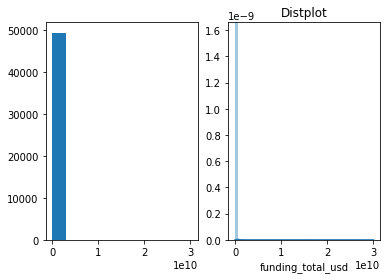

In [47]:
# 21.Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.
import seaborn as sns
fig, ax = plt.subplots(1, 2,)
ax[0].hist(df.funding_total_usd)
sns.distplot(df.funding_total_usd,ax = ax[1])
plt.title('Distplot')
plt.show()

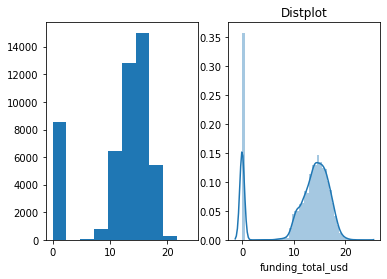

In [48]:
import seaborn as sns
fig, ax = plt.subplots(1, 2,)
ax[0].hist(np.log1p(df.funding_total_usd))
sns.distplot(np.log1p(df.funding_total_usd),ax = ax[1])
plt.title('Distplot')
plt.show()

In [49]:
# 22.What is maximum ‘funding_total_usd’ for each market status?
df.groupby('status')['funding_total_usd'].max()

status
acquired     5.700000e+09
closed       1.567504e+09
operating    3.007950e+10
Name: funding_total_usd, dtype: float64

In [50]:
# 23.How many years it have been since each company was founded?
2020 - df.founded_year

0         8.0
1         NaN
2         8.0
3         9.0
4         6.0
         ... 
49433     7.0
49434     NaN
49435     8.0
49436     NaN
49437    21.0
Name: founded_year, Length: 49438, dtype: float64

In [51]:
from datetime import date
date.today().year - df.founded_year

0         8.0
1         NaN
2         8.0
3         9.0
4         6.0
         ... 
49433     7.0
49434     NaN
49435     8.0
49436     NaN
49437    21.0
Name: founded_year, Length: 49438, dtype: float64

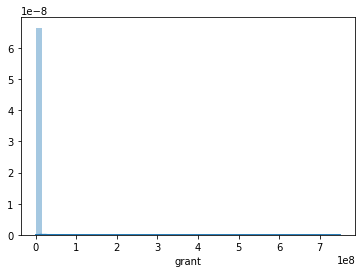

In [52]:
# 24.Visualize ‘grant’ distribution.
sns.distplot(df.grant)

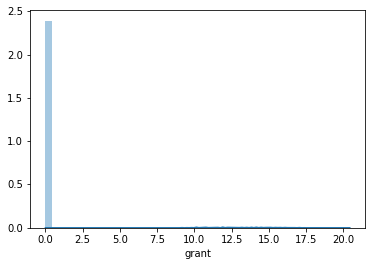

In [53]:
sns.distplot(np.log1p(df.grant))

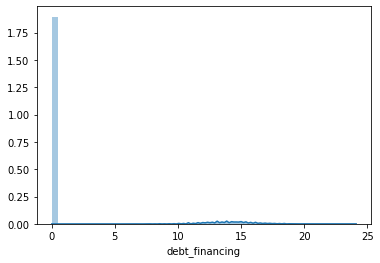

In [54]:
# 25.Visualize ‘debt_financing’ distribution.
sns.distplot(np.log1p(df.debt_financing))